# Node2Vec Preparation


In [1]:
import csv

In [2]:
def format_edgelist(edgelist_filename: str, output_filename: str):
    with open(edgelist_filename, 'r', encoding='utf-8') as readfile:
        csv_reader = csv.reader(readfile)
        next(csv_reader)

        with open(output_filename, 'w', encoding='utf-8') as writefile:
            for row in csv_reader:
                source = row[0]
                target = row[1]
                weight = float(row[2])
                output_string = '\t'.join(map(str, [source, target, weight]))
                writefile.write(f"{output_string}\n")

In [4]:
edgelist_filename = "../data/too_big/all_games_filtered.csv"
output_filename = "../data/too_big/all_games_filtered.edgelist"
format_edgelist(edgelist_filename, output_filename)

# Embedding Generation

This implementation of node2vec can be found [here](https://pecanpy.readthedocs.io/en/latest/pecanpy.html#module-pecanpy.pecanpy). The method of generating the embeddings is based on [this](https://github.com/krishnanlab/PecanPy/blob/master/src/pecanpy/cli.py#L334).

In [1]:
#%pip install pecanpy ipywidgets
from pecanpy import pecanpy as node2vec
from gensim.models import Word2Vec, KeyedVectors

In [2]:
def generate_embeddings(input_edgelist: str, output_filename: str, p=1, q=1):
    num_dimensions = 16
    num_walks = 10
    walk_length = 80
    window_size = 10
    num_workers = 0
    num_epochs = 1
    random_state = 0

    g = node2vec.SparseOTF(p=p, q=q, workers=0, verbose=True)
    g.read_edg(input_edgelist, weighted=True, directed=True)
    walks = g.simulate_walks(num_walks, walk_length)
    model = Word2Vec(
        walks,
        vector_size=num_dimensions,
        window=window_size,
        min_count=0,
        sg=1,
        workers=num_workers,
        epochs=num_epochs,
        seed=random_state,
    )
    
    model.wv.save_word2vec_format(output_filename)

In [5]:
# Generate the embeddings using an edgelist.
input_edgelist = "../data/too_big/all_games_filtered.edgelist"
output_filename = "./all_games.emb"
generate_embeddings(input_edgelist, output_filename)

  0%|          | 0/304330 [00:00<?, ?it/s]

# Node2Vec Analysis

In this notebook, we are using the graph embeddings generated from `node2vec` to discover deeper insight from the graph created by `data/games/network/all_games.csv`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
homophily_embeddings = "../data/games/network/all_games_homophily.emb"
structural_equivalence_embeddings = "../data/games/network/all_games_structural_equivalence.emb"

homophily_df = pd.read_csv(homophily_embeddings, delimiter=" ", skiprows=1, index_col=0, header=None)
structural_equivalence_df = pd.read_csv(structural_equivalence_embeddings, delimiter=" ", skiprows=1, index_col=0, header=None)

In [5]:
homophily_df.rename(columns = {
    1: 'dim_1',
    2: 'dim_2',
    3: 'dim_3',
    4: 'dim_4',
    5: 'dim_5',
    6: 'dim_6',
    7: 'dim_7',
    8: 'dim_8',
    9: 'dim_9',
    10: 'dim_10',
    11: 'dim_11',
    12: 'dim_12',
    13: 'dim_13',
    14: 'dim_14',
    15: 'dim_15',
    16: 'dim_16',
}, inplace=True)
structural_equivalence_df.rename(columns = {
    1: 'dim_1',
    2: 'dim_2',
    3: 'dim_3',
    4: 'dim_4',
    5: 'dim_5',
    6: 'dim_6',
    7: 'dim_7',
    8: 'dim_8',
    9: 'dim_9',
    10: 'dim_10',
    11: 'dim_11',
    12: 'dim_12',
    13: 'dim_13',
    14: 'dim_14',
    15: 'dim_15',
    16: 'dim_16',
}, inplace=True)
homophily_df

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16
0,,,,,,,,,,,,,,,,
k6q4rqzd,0.145573,-0.452953,0.264990,-0.119534,0.129455,-0.267108,-0.199649,0.599524,-0.070836,1.006136,0.383733,0.550951,0.152923,-0.170601,-0.148190,-0.240755
j1ne0vl1,-0.077180,-0.546323,0.428436,-0.141183,0.395298,-0.325404,-0.154671,0.486052,0.039806,1.096610,0.570026,0.540063,0.248493,-0.391804,-0.187473,-0.176759
3dx2j9y1,0.214900,-0.454452,0.380471,-0.509340,0.137263,-0.367487,0.017369,0.233540,-0.437872,0.742608,0.951883,0.687570,0.414884,-0.635657,-0.286647,-0.034274
nd285r3d,0.150929,-0.586535,0.372253,-0.420059,0.518086,-0.690120,0.034900,0.237218,-0.104973,1.191789,0.590629,0.718325,-0.120690,-0.111021,0.021309,-0.210882
j1ll47v1,-0.195784,-0.259720,0.410969,-0.141638,0.386287,-0.316218,-0.325923,0.501284,0.033086,1.024421,0.580995,0.870814,0.551681,-0.191063,-0.153080,-0.128607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pdv2jlr6,0.195778,0.082374,-0.137756,0.084563,-0.160895,0.119872,-0.008269,0.022631,0.002504,0.600562,-0.088546,0.447819,-0.107795,-0.356090,-0.194644,0.151143
w6j7ev26,0.248327,-0.021183,0.034475,-0.065678,-0.079517,0.047129,0.016133,-0.009276,0.043089,0.467608,-0.031353,0.405951,-0.018684,-0.315113,-0.285521,0.006638
9do87g31,0.165451,-0.002001,-0.010148,0.051848,-0.196226,0.111809,-0.088497,-0.042503,0.044326,0.589285,0.001230,0.374076,-0.043375,-0.293868,-0.081265,-0.024547


## Node Similarity

In [6]:
import pandas as pd
from gensim.models import KeyedVectors

def get_vectors_from_embeddings(input_embeddings_filename: str):
    return KeyedVectors.load_word2vec_format(input_embeddings_filename, binary=False)

def format_games_metadata_dataframe(df: pd.DataFrame):
    # Remove row if game do not have a created date.
    df.drop(df[df['created_date'] == 'None'].index, inplace=True)

    # Remove rows with N/As in them.
    df = df.dropna()

    # Format the release_date and created_date to be an actual date type.
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['created_date'] = pd.to_datetime(
        df['created_date'], format='%Y-%m-%dT%H:%M:%SZ')
    df['release_date'] = pd.to_datetime(
        df['release_date'].dt.strftime('%Y-%m-%d'))
    df['created_date'] = pd.to_datetime(
        df['created_date'].dt.strftime('%Y-%m-%d'))

    # Remove rows with a created date or release date before cutoff.
    df = df[(df['created_date'] < '2023-01-01') &
            (df['release_date'] < '2023-01-01')]

    # Format numeric data into a numeric data type.
    df[['num_categories', 'num_levels', 'num_runs', 'num_users', 'num_guests']] = df[[
        'num_categories', 'num_levels', 'num_runs', 'num_users', 'num_guests']].apply(pd.to_numeric)

    # Rename the game_id column to just id.
    df.rename(columns={'game_id': 'id'}, inplace=True)

    return df

def find_most_similar_games(game_id: str, node_vectors: KeyedVectors, metadata_df: pd.DataFrame) -> pd.DataFrame:
    most_similar = node_vectors.most_similar(game_id)
    most_similar_df = pd.DataFrame(most_similar)
    most_similar_df.rename(columns={0: 'id', 1: 'similarity_value'}, inplace=True)
    return metadata_df.merge(most_similar_df, on='id', how='inner').sort_values(by='similarity_value', ascending=False)


In [7]:
node_vectors = get_vectors_from_embeddings(structural_equivalence_embeddings)
games_metadata_df = pd.read_csv("../data/games/metadata/all_games.csv")
games_metadata_df = format_games_metadata_dataframe(games_metadata_df)

In [8]:
game_id = "o1y9okr6"
most_similar_df = find_most_similar_games(game_id, node_vectors, games_metadata_df)
most_similar_df

,id,game_name,developers,release_date,created_date,num_categories,num_levels,num_runs,num_users,num_guests,similarity_value
8,m1mx5op6,No Straight Roads,vegqyg60,2020-08-25,2020-08-26,11,6,291,38,0,0.951296
6,lde3nex6,Katana ZERO,jevkx56k,2019-04-18,2019-03-24,9,12,4172,1074,1,0.943501
3,j1llq2e1,Iconoclasts,w63p8jzx,2018-01-23,2018-01-24,8,0,232,38,0,0.942124
5,369pqq31,Hades Category Extensions,yge0m26p,2018-12-06,2020-10-20,4,0,134,66,0,0.940213
7,lde3oln6,One Step From Eden,yz88q2zw,2020-03-26,2020-04-25,3,0,353,63,0,0.937228
2,o1yw9rdq,Furi,1zkkm9zj,2016-07-05,2016-07-12,8,12,1413,217,0,0.932050
1,9dor8odp,Ori and the Blind Forest,None,2015-03-11,2015-03-13,4,0,617,96,0,0.924998
0,4d7v7zd7,Poker Night at the Inventory,None,2010-11-22,2015-09-14,4,0,34,16,0,0.924112
4,369xpl6l,Light Fall,3zy93164,2018-04-26,2016-11-05,8,17,148,12,0,0.918680
9,9d38rm91,TASOMACHI: Behind the Twilight,1e7vq3e7,2021-04-14,2021-05-22,6,8,67,8,0,0.918324


In [79]:
print(f"Distance: {node_vectors.distance('o1y9wo6q', 'o1ymwk1q')}, Similarity: {node_vectors.similarity('o1y9wo6q', 'o1ymwk1q')}")
print(f"Distance: {node_vectors.distance('o1y9wo6q', 'y654y5ed')}, Similarity: {node_vectors.similarity('o1y9wo6q', 'y654y5ed')}")

Distance: 0.020606040954589844, Similarity: 0.9793939590454102
Distance: 0.730830579996109, Similarity: 0.269169420003891


## PCA and Clustering

In [9]:
df = homophily_df.copy()

### Principal Component Analysis

(30433, 2)


/var/folders/fp/pwtrzcy130zdfcx62mp9_kmc0000gn/T/ipykernel_14045/3263313483.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(transformed_df[:,0],transformed_df[:,1],cmap='plasma')


Text(0, 0.5, 'pc2')

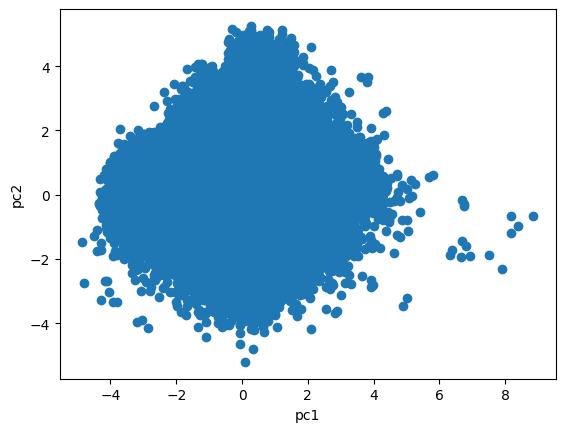

In [10]:
#%pip install scikit-learn scipy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_components = 2

scaled_df = StandardScaler().fit_transform(df)
pca = PCA(number_of_components)
transformed_df = pca.fit_transform(scaled_df)

print(transformed_df.shape)

plt.scatter(transformed_df[:,0],transformed_df[:,1],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

### K-Means Clustering

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


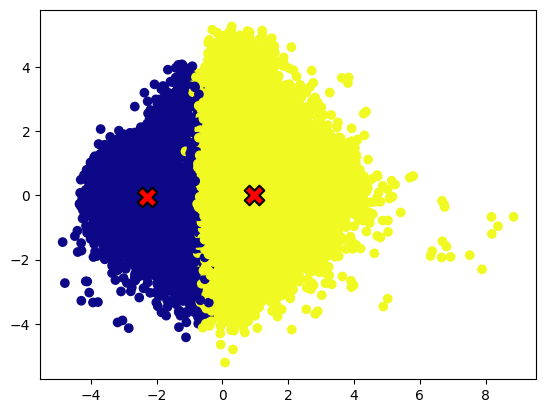

In [11]:
from sklearn.cluster import KMeans

number_of_clusters = 2

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans.fit(scaled_df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(transformed_df[:, 0],transformed_df[:, 1],c=labels,cmap='plasma')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)
plt.show()

### Hyper Parameter Tuning K-Means Clustering

Most of this subsection is taken from [here](https://github.com/Shivangi0503/Wine_Clustering_KMeans/blob/main/WineClustering.py).

In [12]:
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
parameter_grid = ParameterGrid({'n_clusters': parameters})
  
best_score = -1
kmeans_model = KMeans(n_init='auto')
silhouette_scores = []

for p in parameter_grid:
    kmeans_model.set_params(**p)
    kmeans_model.fit(scaled_df)
    ss = metrics.silhouette_score(scaled_df, kmeans_model.labels_)
    silhouette_scores += [ss]
    if ss > best_score:
        best_score = ss
        best_grid = p

best_number_of_clusters = best_grid['n_clusters']
print(best_number_of_clusters)

3


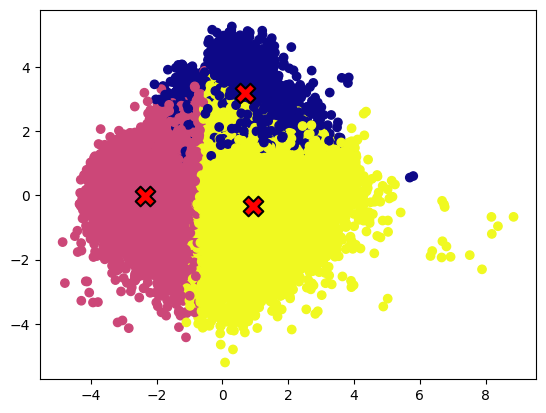

In [15]:
kmeans = KMeans(n_clusters=best_number_of_clusters, random_state=0, n_init='auto')
kmeans.fit(scaled_df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(transformed_df[:,0],transformed_df[:,1],c=labels,cmap='plasma')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)
plt.show()

In [36]:
cluster_df = pd.DataFrame()
cluster_df['id'] = df.index.values
cluster_df['cluster_num'] = kmeans.labels_
cluster_df = cluster_df.set_index('id')


In [37]:
cluster_df.to_csv("../data/games/network/all_games_homophily_clusters.csv")